# Heart Disease Prediction using Python


## Original Analysis Case Study 
## DSC - 550  

In [33]:
# import libraries
import pandas as pd
import yellowbrick

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Step 1: Load the data from the “heart.csv” file into a DataFrame.
addr1 = "heart.csv"
data1 = pd.read_csv(addr1)


In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data1.shape)

The dimension of the table is:  (303, 14)


In [4]:
#Step 3: Display the first 5 rows of data
print(data1.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


From the result we can notice that 
- All are numeric variabes.
- Some variables are continuous and some are catogerical.
- Target is represented as 1 or 0. 
- Target variable will be "target" and other variables will be "features".

In [5]:
#Step 4: making new data frame with dropped NA values  
data = data1.dropna(axis = 0, how ='any')  
 
print("Old data frame length:", len(data1)) 
print("New data frame length:", len(data))  
print("Number of rows with at least 1 NA value: ", (len(data1)-len(data))) 

Old data frame length: 303
New data frame length: 303
Number of rows with at least 1 NA value:  0


From the result we can conclude that there are no missing values in the dataframe.

In [6]:
#Step 5: Look at summary information of data  

print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

From the result we can conclude that all are numeric variables.

In [7]:
# find unique values in each column
uniqueValues = data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


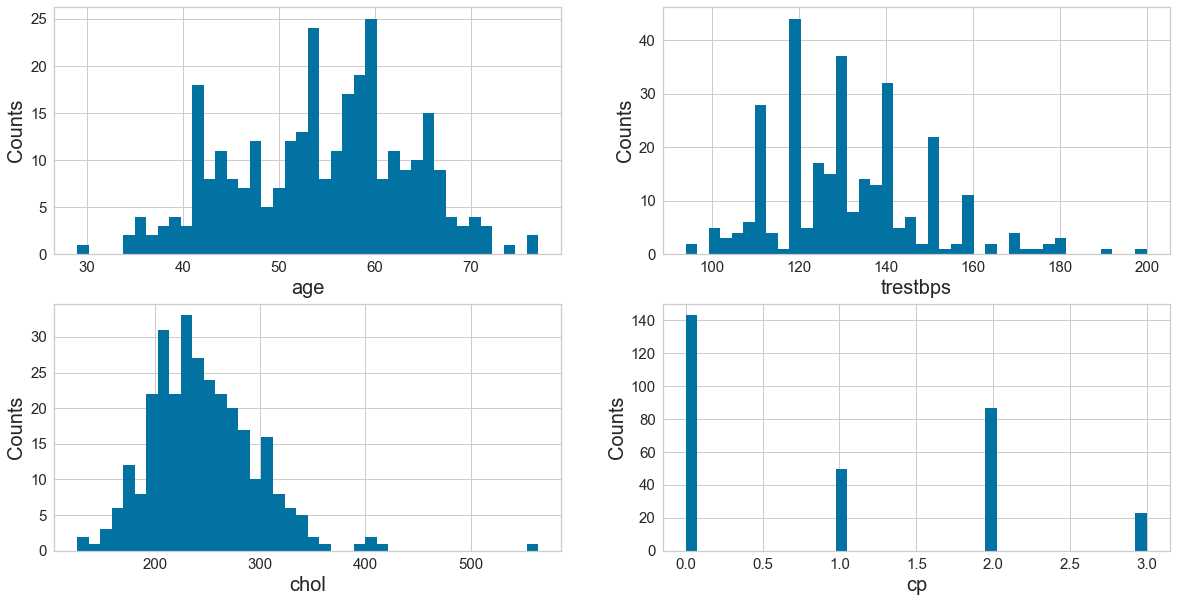

In [8]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# Make some histograms of data 
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'trestbps', 'chol', 'cp']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

From the histograms we can notice that
- Most number of patients are between 50-60 years of age
- Resting blood pressure is 120 for maximum number of patients.
- Serum cholestoral in mg/dl for maximum number of patients is between 200-300.
- Most number of patients reported chest pain type 0.

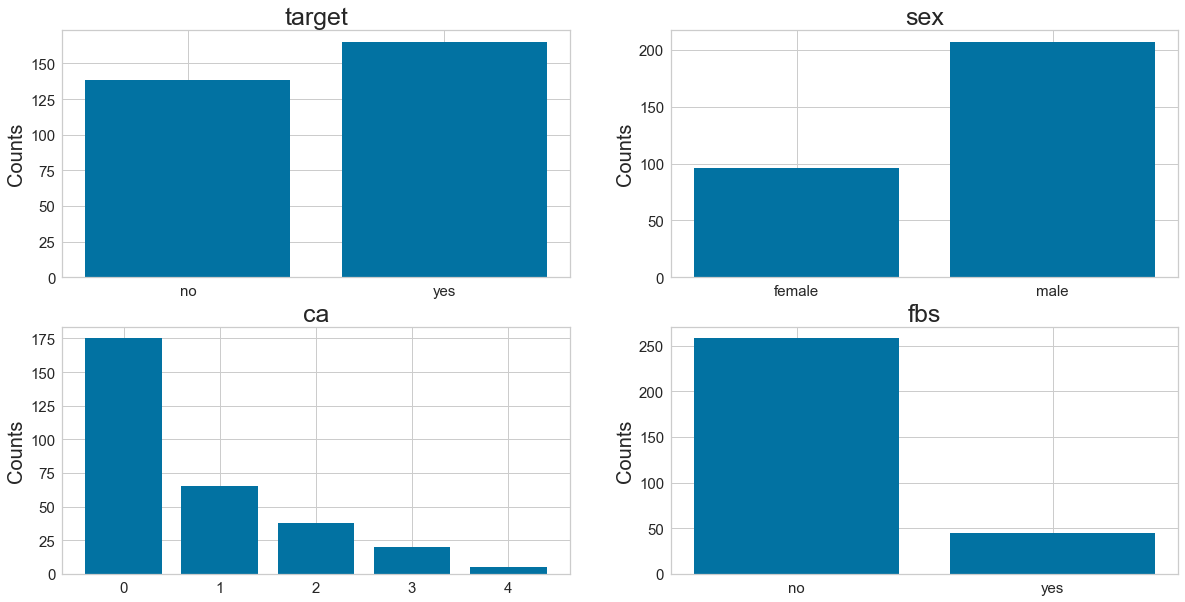

In [9]:
#7: Make some bar charts for variables with only a few options. 

#Barcharts: set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visualizer
X_target = data.replace({'target': {1: 'yes', 0: 'no'}}).groupby('target').size().reset_index(name='Counts')['target']
Y_target = data.replace({'target': {1: 'yes', 0: 'no'}}).groupby('target').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_target, Y_target)
axes[0, 0].set_title('target', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_sex = data.replace({'sex': {1: 'male', 0: 'female'}}).groupby('sex').size().reset_index(name='Counts')['sex']
Y_sex = data.replace({'sex': {1: 'male', 0: 'female'}}).groupby('sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_sex, Y_sex)
axes[0, 1].set_title('sex', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_ca = data.groupby('ca').size().reset_index(name='Counts')['ca']
Y_ca = data.groupby('ca').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_ca, Y_ca)
axes[1, 0].set_title('ca', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_fbs = data.replace({'fbs': {1: 'yes', 0: 'no'}}).groupby('fbs').size().reset_index(name='Counts')['fbs']
Y_fbs = data.replace({'fbs': {1: 'yes', 0: 'no'}}).groupby('fbs').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_fbs, Y_fbs)
axes[1, 1].set_title('fbs', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()


From the bar charts we can conclude that:
- There is more number of data available for male patients
- Patients with presence of heart disease are more.
- More patients are with number of major vessels colored by flourosopy is 0.
- Fasting blood sugar > 120 mg/dl for fewer number of patients.

In [10]:
# correlation between variables
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


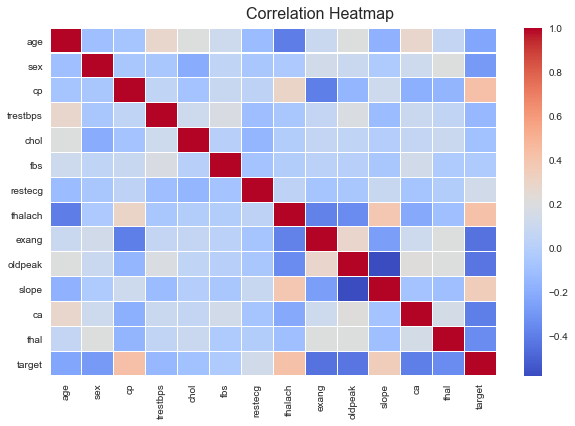

In [11]:
#Step 8: To see if the data is correlated, make some Pearson Ranking charts

# import package
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=16)

From Pearson Ranking chart we can conclude that,
- There is some positive correlation between age, trestbps, age, ca and slope,thalach.
- There is some negative correlation between age,thalach, exang,cp and slope, oldpeak.

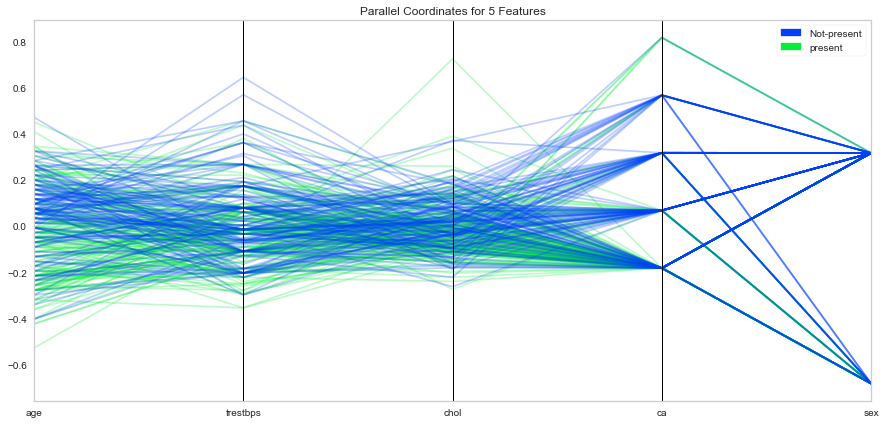

In [12]:
# Step 9:  Use Parallel Coordinates visualization to compare the distributions of numerical variables for presence of 
# heart disease in the patients.
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visualizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-present', 'present']
num_features = ['age', 'trestbps', 'chol', 'ca','sex']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.target.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show()

From Parallel Coordinates visualization we can conclude that:
- More number of male patients have the presence of heart disease.
- As the chol value increases the presence of heart disease also increased.
- As the number of major vessels colored by flourosopy increases the presence of heart disease also increased.
- Age doesn't have much impact on the presence of heart disease.

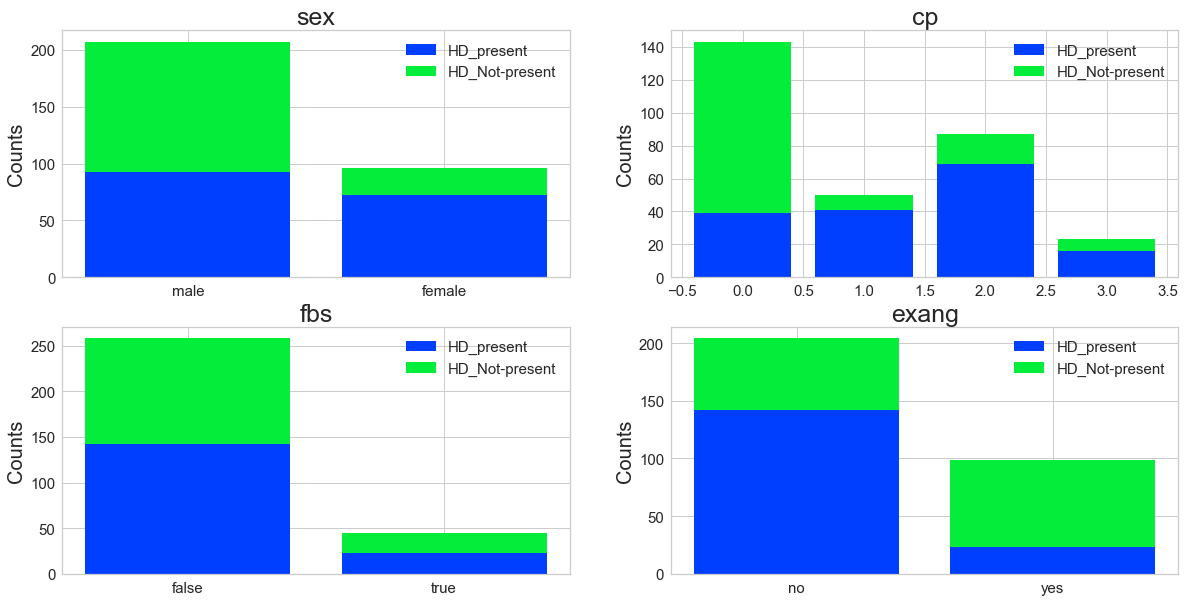

In [13]:
# Step 10 - Use stacked bar charts to compare presence of heart disease in the patient.
#set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
sex_HD_present = data.replace({'target': {1: 'HD_present', 0: 'HD_Not-present'}}).replace({'sex': {1: 'male', 0: 'female'}})[data['target']==1]['sex'].value_counts()
sex_HD_not_present = data.replace({'target': {1: 'HD_present', 0: 'HD_Not-present'}}).replace({'sex': {1: 'male', 0: 'female'}})[data['target']==0]['sex'].value_counts()
sex_HD_not_present = sex_HD_not_present.reindex(index = sex_HD_present.index)
# make the bar plot
p1 = axes[0, 0].bar(sex_HD_present.index, sex_HD_present.values)
p2 = axes[0, 0].bar(sex_HD_not_present.index, sex_HD_not_present.values, bottom=sex_HD_present.values)
axes[0, 0].set_title('sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('HD_present', 'HD_Not-present'), fontsize = 15)

# make the data read to feed into the visualizer
cp_HD_present = data.replace({'target': {1: 'present', 0: 'Not-present'}})[data['target']==1]['cp'].value_counts()
cp_HD_not_present = data.replace({'target': {1: 'present', 0: 'Not-present'}})[data['target']==0]['cp'].value_counts()
cp_HD_not_present = cp_HD_not_present.reindex(index = cp_HD_present.index)
# make the bar plot
p3 = axes[0, 1].bar(cp_HD_present.index, cp_HD_present.values)
p4 = axes[0, 1].bar(cp_HD_not_present.index, cp_HD_not_present.values, bottom=cp_HD_present.values)
axes[0, 1].set_title('cp', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('HD_present', 'HD_Not-present'), fontsize = 15)

# make the data read to feed into the visualizer
fbs_HD_present = data.replace({'target': {1: 'present', 0: 'Not-present'}}).replace({'fbs': {1: 'true', 0: 'false'}})[data['target']==1]['fbs'].value_counts()
fbs_HD_not_present = data.replace({'target': {1: 'present', 0: 'Not-present'}}).replace({'fbs': {1: 'true', 0: 'false'}})[data['target']==0]['fbs'].value_counts()
fbs_HD_not_present = fbs_HD_not_present.reindex(index = fbs_HD_present.index)
# make the bar plot
p5 = axes[1, 0].bar(fbs_HD_present.index, fbs_HD_present.values)
p6 = axes[1, 0].bar(fbs_HD_not_present.index, fbs_HD_not_present.values, bottom=fbs_HD_present.values)
axes[1, 0].set_title('fbs', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('HD_present', 'HD_Not-present'), fontsize = 15)

# make the data read to feed into the visualizer
exang_HD_present = data.replace({'target': {1: 'present', 0: 'Not-present'}}).replace({'exang': {1: 'yes', 0: 'no'}})[data['target']==1]['exang'].value_counts()
exang_HD_not_present = data.replace({'target': {1: 'present', 0: 'Not-present'}}).replace({'exang': {1: 'yes', 0: 'no'}})[data['target']==0]['exang'].value_counts()
exang_HD_not_present = exang_HD_not_present.reindex(index = exang_HD_present.index)
# make the bar plot
p7 = axes[1, 1].bar(exang_HD_present.index, exang_HD_present.values)
p8 = axes[1, 1].bar(exang_HD_not_present.index, exang_HD_not_present.values, bottom=exang_HD_present.values)
axes[1, 1].set_title('exang', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('HD_present', 'HD_Not-present'), fontsize = 15)
plt.show()

From the stacked bar charts we can conclude that:
- The percentage of presence of heart disease is more in female patients.
- Chest pain type 2 had more number of heart disease patients.
- Heart disease is not dependent on fasting blood sugar
- More number of heart disease patients does not have exercise induced angina.

In [14]:
# Step 11 - fill in missing values and eliminate features
# Count all null values in the DataFrame (both columns & Rows)
data.isnull().sum().sum()

0

In [15]:
# Count total NaN at each column in DataFrame
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the results we can conclude that there are no missing values in the data set. So we can move to the next step.

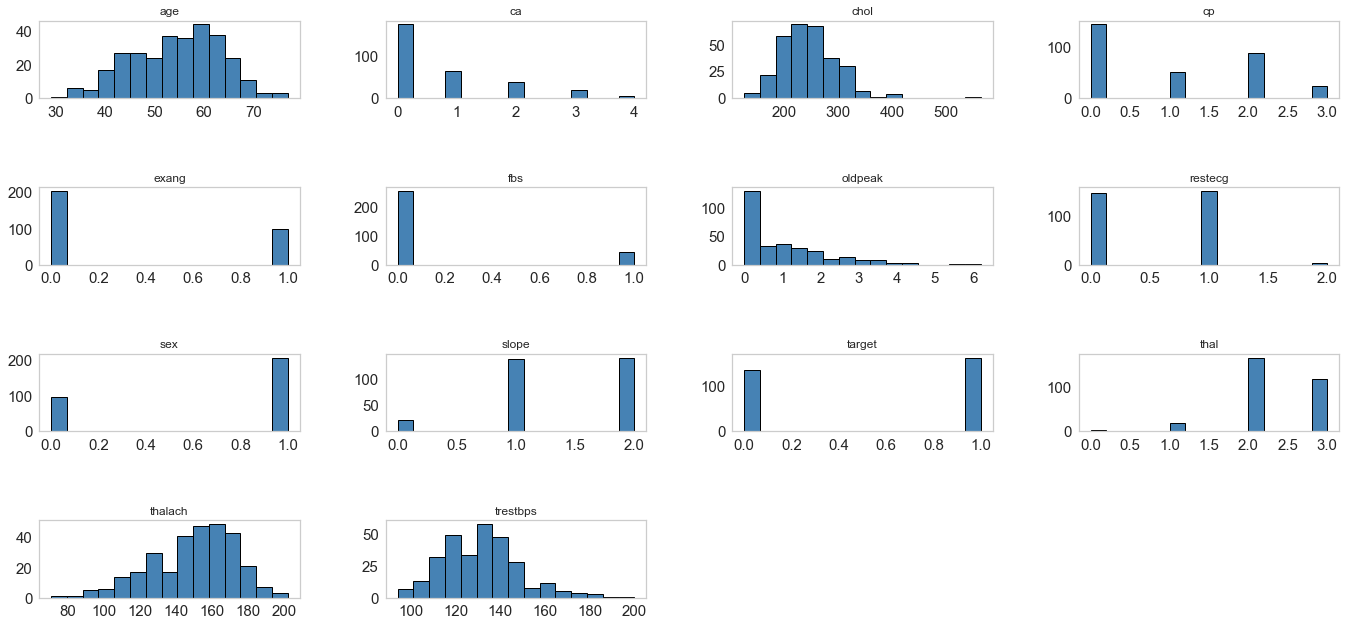

In [16]:
# step 12: look for skewness in histograms
# plot histograms for multiple variables in the dataset
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=15, ylabelsize=15, grid=False)    
plt.tight_layout(rect=(0, 0, 1, 1)) 


From the above histograms we can see that the data is not very much skewed. So i have decided to keep the data as it is.

In [17]:
#Step 13 - convert some categorical data to numbers
#get the categorical data
cat_features = ['fbs','sex']
data_cat = data[cat_features]
data_cat = data_cat.replace({'fbs':{1 : 'true', 0: 'false'}})
data_cat = data_cat.replace({'sex': {1: 'male', 0: 'female'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(10))

   fbs_false  fbs_true  sex_female  sex_male
0          0         1           0         1
1          1         0           0         1
2          1         0           1         0
3          1         0           0         1
4          1         0           1         0
5          1         0           0         1
6          1         0           1         0
7          1         0           0         1
8          0         1           0         1
9          1         0           0         1


In [18]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
import numpy as np
# here we will combine the numerical features and the dummie features together
#features_model = ['cp', 'ca', 'slope', 'thalach','exang','oldpeak','thal']
#data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)
data_model_X = data.drop(['target'], 1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'target': {1: 'present', 0: 'Not_present'}})['target']

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.2, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

# Survived and not-survived
print('\n')
print('No. of patients with heart disease present and not-present in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of patients with heart disease present and not-present in the validation set:')
print(y_test.value_counts())


No. of samples in training set:  242
No. of samples in validation set: 61


No. of patients with heart disease present and not-present in the training set:
present        128
Not_present    114
Name: target, dtype: int64


No. of patients with heart disease present and not-present in the validation set:
present        37
Not_present    24
Name: target, dtype: int64


By looking at the correation matrix first i took the features_model as ['cp', 'ca', 'slope', 'thalach','exang','oldpeak','thal'] and got the model accuracy as 77%. Later i have decided to continue my work by comparing different models for which i took data_model_X = data.drop(['target'], 1) and i have got the accuracy as 81.96%. Model accuracy improved considerably. So i have continued my further analysis with it. 

### Logistic Regression

Accuracy of Logistic Regression model is: 0.819672131147541


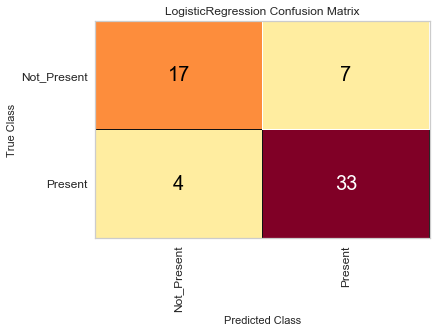

In [19]:
# Step 15 - Evaluate Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(solver= 'liblinear')
model.fit(X_train, y_train)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy of Logistic Regression model is:', score)

# set up the figure size for the confusion matrices
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Present','Present']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#show confusion matrix
cm.poof()


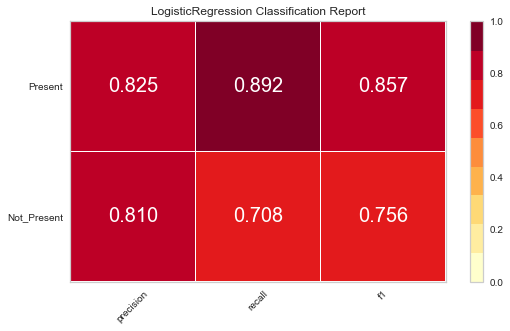

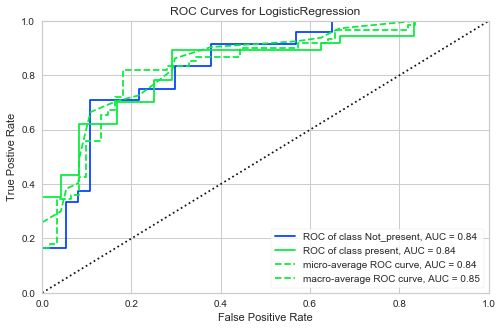

In [20]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### DecisionTreeClassifier

Accuracy of DecisionTreeClassifier is: 0.7049180327868853


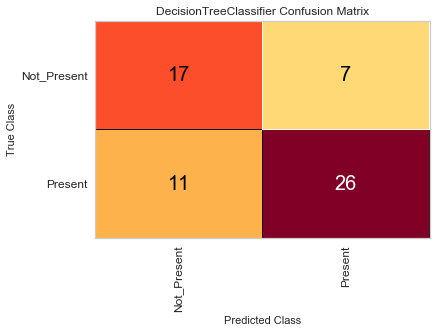

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

# Use score method to get accuracy of model
score1 = model1.score(X_test, y_test)
print('Accuracy of DecisionTreeClassifier is:', score1)

# set up the figure size for the confusion matrices
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Present','Present']
cm1 = ConfusionMatrix(model1, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm1.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm1.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm1.ax.texts:
    label.set_size(20)

#show confusion matrix
cm1.poof()

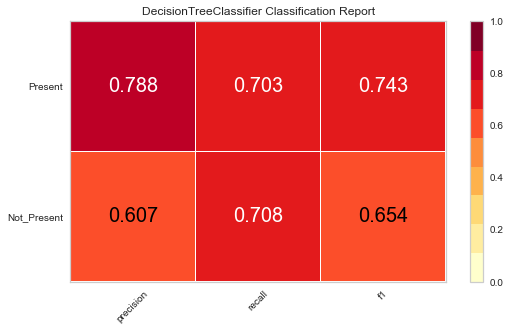

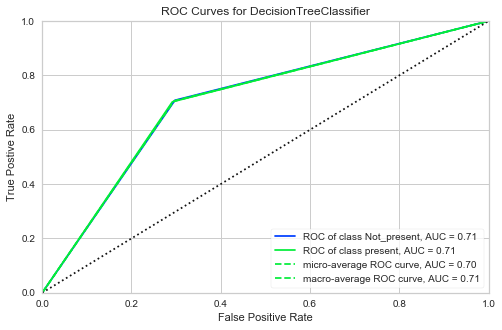

In [22]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model1, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model1)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### RandomForestClassifier

Accuracy of RandomForestClassifier is: 0.7868852459016393


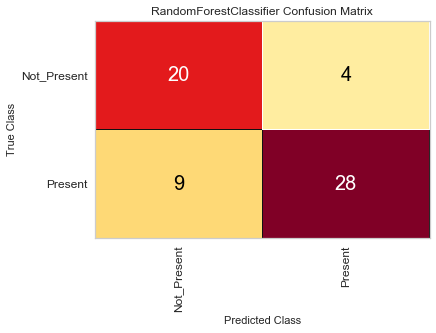

In [23]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the RandomForestClassifier 
model2 = RandomForestClassifier(n_estimators = 10)
model2.fit(X_train, y_train)

# Use score method to get accuracy of model
score2 = model2.score(X_test, y_test)
print('Accuracy of RandomForestClassifier is:', score2)

# set up the figure size for the confusion matrices
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Present','Present']
cm2 = ConfusionMatrix(model2, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm2.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm2.ax.texts:
    label.set_size(20)

#show confusion matrix
cm2.poof()

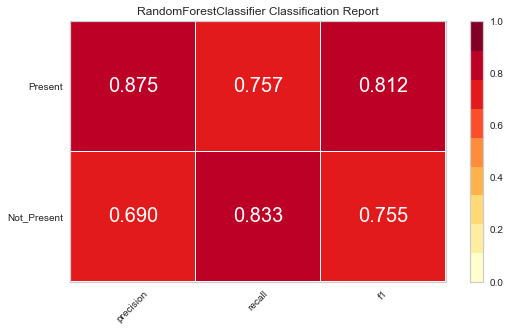

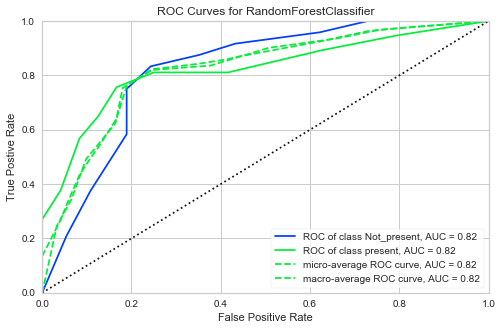

In [24]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model2, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Creating a  Binary Classification Problem

In [25]:
import keras

# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

Using TensorFlow backend.


In [26]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [27]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [28]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0]


In [32]:
from keras.layers import Dense
from keras.models import Sequential

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, 
                         batch_size=10, verbose = 10)


Train on 242 samples, validate on 61 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
E

In [31]:
# generate classification report using predictions for categorical model

from sklearn.metrics import classification_report, accuracy_score

# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model :')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model :
0.7704918032786885
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.90      0.70      0.79        37

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



I have used different classifiers for my analysis and compared the results.

- Accuracy of Logistic Regression model is: 81.96%
- Accuracy of DecisionTreeClassifier is: 70.49%
- Accuracy of RandomForestClassifier is: 78.68%

All the ROC curves are above the dotted lines which signifies the predicted values are much better than the randomly guessed values.

- Finally I have created a Binary Classification Problem using keras and got the model accuracy as 77%.

From my analysis I can conclude that Logistic Regression model is best for this dataset for which maximum accuracy was achieved. Further the dataset is small if we can train the model with larger data, we can hopefully get better results. 